# **What is Principal Component Analysis (PCA)?**

PCA refers to a dimensionality reduction and machine learning method used to simplify a large data set into a smaller set while still maintaining significant patterns and trends. This is done by transforming the original variables into a set of new, uncorrelated variables called principal components.

# **How to perform PCA?**
<br>
1. Standardize the range of continuous initial variables
<br>
2. Compute the covariance matrix to identify correlations
<br>
3. Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
<br>
4. Selection of principal components
<br>
5.  Data transformation in new dimensional space
<br>
6. Data Reconstruction (Optional)
<br>
7. Interpretation and Analysis

***Perform PCA on the Iris dataset following the steps***

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

1. Standardize the features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

2. Compute the covariance matrix

In [ ]:
covariance_matrix = np.cov(X_scaled.T)

3. Compute eigenvalues and eigenvectors

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Pair the eigenvalues with their corresponding eigenvectors
eig_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Extract the explained variance and the principal components
total_variance = sum(eigenvalues)
explained_variance = [(i / total_variance) * 100 for i in sorted(eigenvalues, reverse=True)]
cumulative_explained_variance = np.cumsum(explained_variance)


4. Selection of principal components

In [ ]:
n_components = 2

5. Data transformation in new dimensional space

In [ ]:
# Creating the projection matrix based on top k eigenvectors
projection_matrix = np.hstack([eig_pairs[i][1].reshape(X.shape[1],1) for i in range(n_components)])

# Project the data onto the new feature space
X_pca = X_scaled.dot(projection_matrix)

6. Reconstructing the data (optional)

In [ ]:
X_reconstructed = X_pca.dot(projection_matrix.T) + scaler.mean_

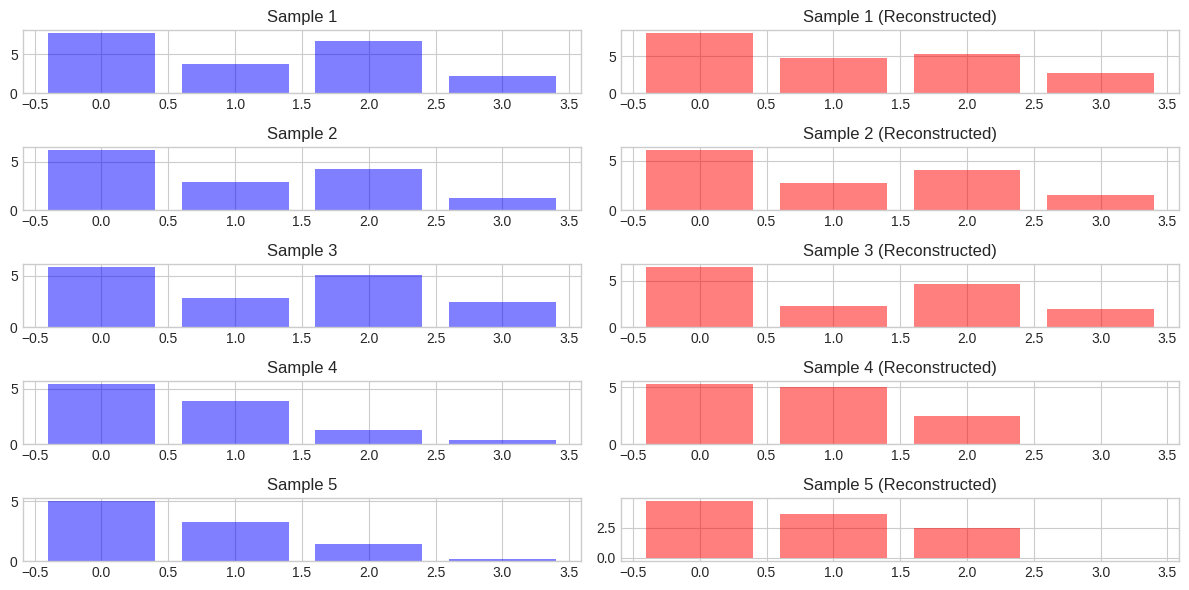

In [ ]:
# Select random samples
sample_indices = np.random.choice(range(len(X)), 5, replace=False)

# Plot original vs. reconstructed data for selected samples
plt.figure(figsize=(12, 6))
for i, index in enumerate(sample_indices):
    plt.subplot(5, 2, 2*i+1)
    plt.bar(range(X.shape[1]), X[index], color='b', alpha=0.5, label='Original')
    plt.title('Sample {}'.format(i+1))
    plt.subplot(5, 2, 2*i+2)
    plt.bar(range(X_reconstructed.shape[1]), X_reconstructed[index], color='r', alpha=0.5, label='Reconstructed')
    plt.title('Sample {} (Reconstructed)'.format(i+1))
plt.tight_layout()
plt.show()


Reconstructing the data shows how well the principal components represent the original data. Comparing the original and reconstructed data helps in understanding the amount of information loss incurred during dimensionality reduction.

7. Interpretation and Analysis:

In [ ]:
# Explained variance ratios
print("Explained Variance Ratios:")
for i, ev in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {ev:.2f}%")

# Cumulative explained variance
print("\nCumulative Explained Variance:")
for i, cev in enumerate(cumulative_explained_variance):
    print(f"Principal Components {i+1}: {cev:.2f}%")


Explained Variance Ratios:
Principal Component 1: 72.96%
Principal Component 2: 22.85%
Principal Component 3: 3.67%
Principal Component 4: 0.52%

Cumulative Explained Variance:
Principal Components 1: 72.96%
Principal Components 2: 95.81%
Principal Components 3: 99.48%
Principal Components 4: 100.00%


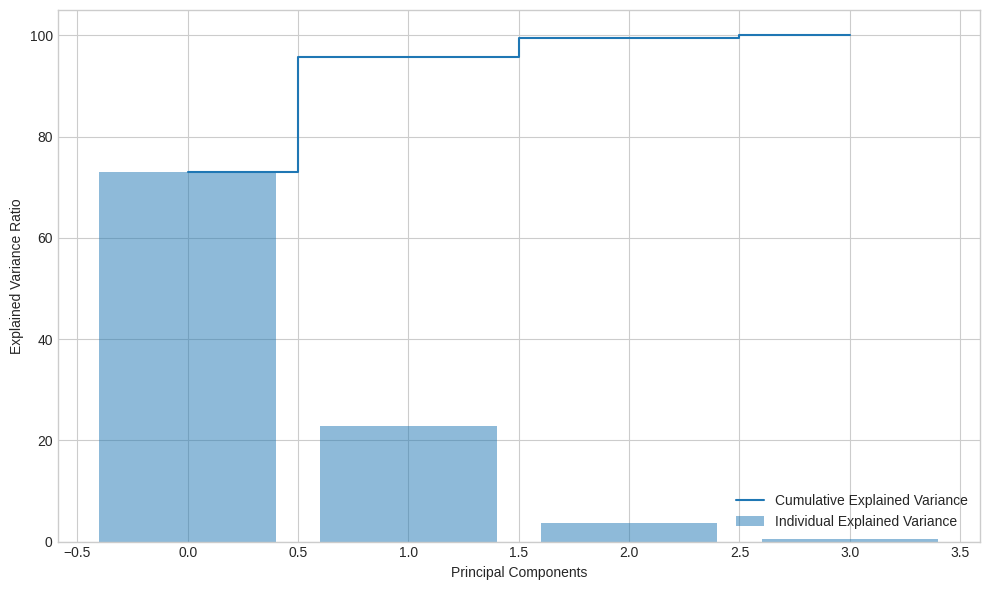

In [ ]:
# Visualize the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(len(cumulative_explained_variance)), cumulative_explained_variance, where='mid', label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


- The explained variance ratios help us understand how much information each principal component carries compared to the others.
- The cumulative explained variance helps us decide how many principal components to retain based on the amount of variance we want to preserve, as they provide insight into how much of the total variance in the dataset is explained as we include more principal components.

*Based on explain variance ratios:
 the first two components capture a substantial portion of the variance, and adding additional components contributes less to the total explained variance.

 *Based on cumulative explained variance:
 by retaining the first two or three principal components would retain the vast majority of the variability in the data.

In conclusion,  the results of PCA on the Iris dataset show that the first two principal components are the most informative in capturing the variability present in the dataset, while the third and fourth components contribute less significantly.


Overall, PCA provides a powerful tool for exploratory data analysis, dimensionality reduction, and feature extraction, allowing us to gain insights into the structure of complex datasets like the Iris dataset.

# ***Applications of PCA:***

Principal component analysis has a variety of applications in our day-to-day life, for example:
<br>

**1. Finance**
<br>
Forecasting stock prices from past prices is a notion used in research for years. PCA can be used for dimensionality reduction and analyzing the data to help experts find relevant components that account for most of the data’s variability.

**2. Image processing**
<br>
An image is made of multiple features. PCA is mainly applied in image compression to retain the essential details of a given image while reducing the number of dimensions. In addition, PCA can be used for more complicated tasks such as image recognition.   

**3. Healthcare**
<br>
In the same logic of image compression. PCA is used in magnetic resonance imaging (MRI) scans to reduce the dimensionality of the images for better visualization and medical analysis. It can also be integrated into medical technologies used, for instance, to recognize a given disease from image scans.

**4. Security**
<br>
Biometric systems used for fingerprint recognition can integrate technologies leveraging principal component analysis to extract the most relevant features, such as the texture of the fingerprint and additional information.

# *example of PCA application:* **Image Recognition**

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the Labeled Faces in the Wild (LFW) dataset
faces = fetch_lfw_people(min_faces_per_person=60)

#target names and the shape of the images
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


**Data splitting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

# scale the pixel values of the data
X_train = X_train / 255.0
X_test = X_test / 255.0

**PCA application**

In [ ]:
n_components = 150
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

*Some required function definition*

In [ ]:
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=faces.target_names))

# Function to visualize eigenfaces
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

Machine Learning models trained:
<br>
1. **Support Vector Machine**
2. **Random Forest**
3. **Logistic Regression**

In [ ]:
svm = SVC(kernel='rbf', class_weight='balanced', gamma='scale')
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, multi_class='auto')

***without PCA***

In [ ]:
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
print("Evaluation without PCA")
print("SVM:")
evaluate_model(svm, X_test, y_test)
print("Random Forest:")
evaluate_model(rf, X_test, y_test)
print("Logistic Regression:")
evaluate_model(lr, X_test, y_test)

Evaluation without PCA
SVM:
                   precision    recall  f1-score   support

     Ariel Sharon       0.69      0.73      0.71        15
     Colin Powell       0.76      0.81      0.79        68
  Donald Rumsfeld       0.74      0.74      0.74        31
    George W Bush       0.87      0.79      0.82       126
Gerhard Schroeder       0.39      0.57      0.46        23
      Hugo Chavez       0.92      0.55      0.69        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.69      0.74      0.71        42

         accuracy                           0.76       337
        macro avg       0.74      0.74      0.73       337
     weighted avg       0.78      0.76      0.76       337

Random Forest:
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.07      0.12        15
     Colin Powell       0.71      0.75      0.73        68
  Donald Rumsfeld       0.82      0.29      0.43        31
    Georg

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***with PCA***

In [ ]:
svm_pca = SVC(kernel='rbf', class_weight='balanced', gamma='scale')
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
lr_pca = LogisticRegression(max_iter=1000, multi_class='auto')

svm_pca.fit(X_train_pca, y_train)
rf_pca.fit(X_train_pca, y_train)
lr_pca.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
print("Evaluation with PCA")
print("SVM with PCA:")
evaluate_model(svm_pca, X_test_pca, y_test)
print("Random Forest with PCA:")
evaluate_model(rf_pca, X_test_pca, y_test)
print("Logistic Regression with PCA:")
evaluate_model(lr_pca, X_test_pca, y_test)

Evaluation with PCA
SVM with PCA:
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.67      0.80        15
     Colin Powell       0.66      0.96      0.78        68
  Donald Rumsfeld       0.93      0.81      0.86        31
    George W Bush       0.89      0.87      0.88       126
Gerhard Schroeder       0.94      0.65      0.77        23
      Hugo Chavez       1.00      0.65      0.79        20
Junichiro Koizumi       1.00      0.75      0.86        12
       Tony Blair       0.88      0.83      0.85        42

         accuracy                           0.83       337
        macro avg       0.91      0.77      0.82       337
     weighted avg       0.86      0.83      0.84       337

Random Forest with PCA:
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.07      0.12        15
     Colin Powell       0.81      0.56      0.66        68
  Donald Rumsfeld       0.00      0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pip install tabulate

In [ ]:
from tabulate import tabulate

accuracy_scores = {
    "Model": ["SVM", "Random Forest", "Logistic Regression"],
    "Accuracy without PCA": [
        svm.score(X_test, y_test),
        rf.score(X_test, y_test),
        lr.score(X_test, y_test)
    ],
    "Accuracy with PCA": [
        svm_pca.score(X_test_pca, y_test),
        rf_pca.score(X_test_pca, y_test),
        lr_pca.score(X_test_pca, y_test)
    ]
}

print(tabulate(accuracy_scores, headers="keys", tablefmt="grid"))


+---------------------+------------------------+---------------------+
| Model               |   Accuracy without PCA |   Accuracy with PCA |
+=====================+========================+=====================+
| SVM                 |               0.756677 |            0.833828 |
+---------------------+------------------------+---------------------+
| Random Forest       |               0.646884 |            0.519288 |
+---------------------+------------------------+---------------------+
| Logistic Regression |               0.373887 |            0.804154 |
+---------------------+------------------------+---------------------+


Comparing the results, we observe that SVM and Logistic Regression classifiers achieve higher accuracy after applying PCA. This suggests that PCA helped in reducing the dimensionality of the feature space while preserving relevant information, resulting in better  performance.

While for Random Forest:
The accuracy decreased to 51.93% after applying PCA. In some cases, dimensionality reduction with PCA might not benefit all types of models, and Random Forest may not perform well on the reduced feature space.

Conclusion:
<br>
The impact of PCA may varies across different models. While SVM benefited from dimensionality reduction, Random Forest's performance decreased, and Logistic Regression experienced a significant improvement. These results emphasize the importance of choosing appropriate techniques for dimensionality reduction based on the characteristics of the dataset and the learning algorithm used.

***Optional Steps***

**-Eigenfaces visualization-**
<br>
Eigenfaces are a set of eigenvectors derived from the covariance matrix of a set of face images. In the context of face recognition, eigenfaces represent the principal components or underlying patterns in a dataset of face images.
<br>
- Each eigenface is essentially a template face, representing a unique pattern of facial features. These eigenfaces can be used to reconstruct any face in the dataset as a linear combination of the eigenfaces.
<br>
- To recognize a new face, its image is projected onto the eigenfaces space, and then compared to known faces based on some distance metric or classification algorithm.

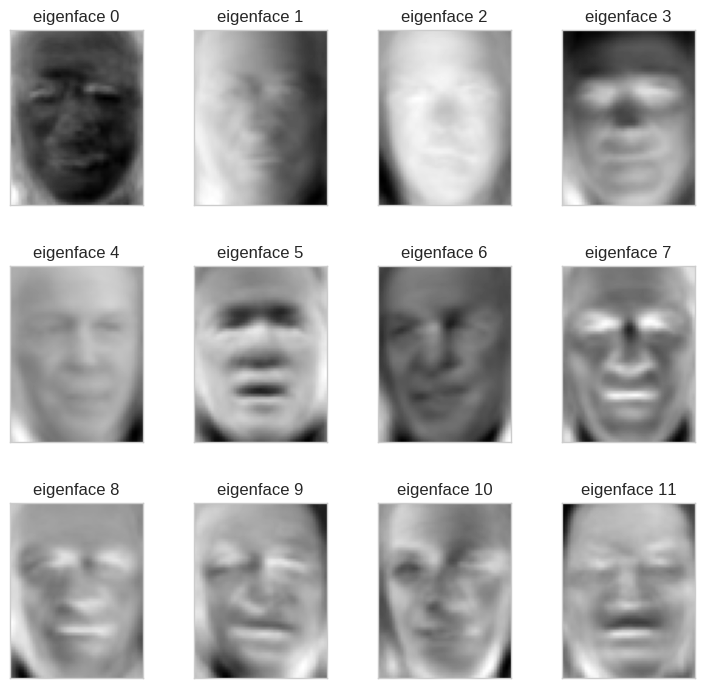

In [ ]:
# Visualize eigenfaces
eigenfaces = pca.components_.reshape((n_components, faces.images.shape[1], faces.images.shape[2]))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, faces.images.shape[1], faces.images.shape[2])


-**Data Reconstruction**-
<br>
This step is to reconstruct the images from the PCA-transformed space back to the original space.
The reconstructed data can be visualized to gain insights into the underlying structure and patterns present in the original dataset.

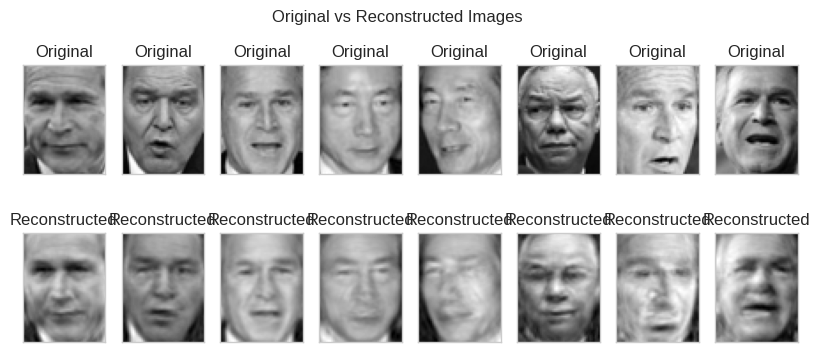

In [ ]:
# Perform data reconstruction from PCA-transformed space to original space
X_train_reconstructed = pca.inverse_transform(X_train_pca)
X_test_reconstructed = pca.inverse_transform(X_test_pca)

# Visualize reconstructed images
plt.figure(figsize=(10, 4))
for i in range(8):
    # Original Image
    plt.subplot(2, 8, i + 1)
    plt.imshow(X_test[i].reshape(62, 47), cmap=plt.cm.gray)
    plt.title('Original')
    plt.xticks(())
    plt.yticks(())

    # Reconstructed Image
    plt.subplot(2, 8, i + 1 + 8)
    plt.imshow(X_test_reconstructed[i].reshape(62, 47), cmap=plt.cm.gray)
    plt.title('Reconstructed')
    plt.xticks(())
    plt.yticks(())

plt.suptitle('Original vs Reconstructed Images')
plt.show()
